## Dependencies

Listed here:
* https://duckdb.org/docs/guides/python/jupyter.html

In [1]:
# Load duckdb, which lets us efficiently load large files
import duckdb

# Load pandas, which lets us manipulate dataframes
import pandas as pd

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# Set configrations on jupysql to directly output data to Pandas and to simplify the output that is printed to the notebook.
%config SqlMagic.autopandas = True

%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# Allow named parameters (python variables) in SQL cells
%config SqlMagic.named_parameters=True

# Connect jupysql to DuckDB using a SQLAlchemy-style connection string. Either connect to an in memory DuckDB, or a file backed db.
%sql duckdb:///:memory:

/Users/me/jaanli/exploring_american_community_survey_data/.venv/lib/python3.11/site-packages/sql/traits.py:20: FutureWarning: named_parameters: boolean values are now deprecated. Value True will be treated as "enabled". 
Please use a valid option: "warn", "enabled", or "disabled". 
For more information, see the docs: https://jupysql.ploomber.io/en/latest/api/configuration.html#named-parameters
  warnings.warn(


In [4]:
import yaml

yaml_path = '../american_community_survey/dbt_project.yml'
with open(yaml_path, 'r') as file:
    config = yaml.safe_load(file)

output_path = config['vars']['output_path']
print(output_path)

~/data/american_community_survey


In [6]:
%%sql 
SELECT * FROM '~/data/american_community_survey/individual_people_united_states_*.parquet'

,Record Type,Housing unit/GQ person serial number,Division code based on 2010 Census definitions Division code based on 2020 Census definitions,Person number,"Public use microdata area code (PUMA) based on 2020 Census definition (areas with population of 100,000 or more, use with ST for unique code)",Region code based on 2020 Census definitions,State Code based on 2020 Census definitions,Adjustment factor for income and earnings dollar amounts (6 implied decimal places),Person's weight,Age,...,Person's Weight replicate 71,Person's Weight replicate 72,Person's Weight replicate 73,Person's Weight replicate 74,Person's Weight replicate 75,Person's Weight replicate 76,Person's Weight replicate 77,Person's Weight replicate 78,Person's Weight replicate 79,Person's Weight replicate 80
0,P,2022GQ0000031,6,01,02803,3,01,1042311,69,85,...,71,69,68,69,69,69,69,69,71,70
1,P,2022GQ0000111,6,01,02000,3,01,1042311,22,51,...,39,22,2,22,22,4,28,43,41,4
2,P,2022GQ0000200,6,01,02803,3,01,1042311,45,36,...,8,30,44,11,47,87,99,40,42,44
3,P,2022GQ0000261,6,01,01100,3,01,1042311,4,74,...,4,4,3,4,4,3,3,4,4,3
4,P,2022GQ0000296,6,01,01502,3,01,1042311,47,49,...,60,10,10,52,52,40,69,60,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,P,2022HU1444522,8,01,00400,4,56,1042311,119,33,...,154,118,55,72,29,49,196,173,162,124
3373374,P,2022HU1444522,8,02,00400,4,56,1042311,89,27,...,151,87,38,67,22,33,124,97,135,115
3373375,P,2022HU1444522,8,03,00400,4,56,1042311,177,1,...,385,182,81,136,43,73,214,150,202,258
3373376,P,2022HU1446126,8,01,00200,4,56,1042311,126,66,...,41,38,116,143,230,127,111,149,119,136


In [7]:
%%sql 
SELECT * FROM '~/data/american_community_survey/housing_units_united_states_*.parquet'

,Record Type,Housing unit/GQ person serial number,Division code based on 2010 Census definitions Division code based on 2020 Census definitions,"Public use microdata area code (PUMA) based on 2020 Census definition (areas with population of 100,000 or more, use with ST for unique code)",Region code based on 2020 Census definitions,State Code based on 2020 Census definitions,Adjustment factor for housing dollar amounts (6 implied decimal places),Adjustment factor for income and earnings dollar amounts (6 implied decimal places),Housing Unit Weight,Number of persons in this household,...,Housing Weight replicate 71,Housing Weight replicate 72,Housing Weight replicate 73,Housing Weight replicate 74,Housing Weight replicate 75,Housing Weight replicate 76,Housing Weight replicate 77,Housing Weight replicate 78,Housing Weight replicate 79,Housing Weight replicate 80
0,H,2022GQ0000175,4,01105,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
1,H,2022GQ0000254,4,02600,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
2,H,2022GQ0000257,4,00200,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
3,H,2022GQ0000283,4,00100,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
4,H,2022GQ0000285,4,01600,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611645,H,2022HU1446030,6,00800,3,28,1000000,1042311,40,2,...,77,15,30,82,87,51,53,8,69,57
1611646,H,2022HU1446092,6,00600,3,28,1000000,1042311,34,5,...,38,20,9,47,30,8,12,62,36,43
1611647,H,2022HU1446243,6,01101,3,28,1000000,1042311,38,2,...,54,9,33,41,43,12,47,63,36,11
1611648,H,2022HU1446341,6,01900,3,28,1000000,1042311,95,4,...,89,73,24,28,189,200,39,73,180,122


In [5]:
df = _

Text(0.5, 1.0, 'Age of the householder')

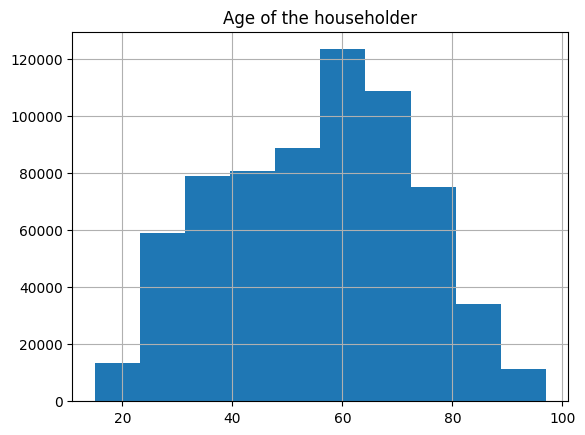

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df['HHLDRAGEP'].hist(ax=ax)
ax.set_title('Age of the householder') # from 



In [10]:
output_path

'~/data/american_community_survey'

In [22]:
# collect the unique headers of all csv files recursively globbed in the output path
from pathlib import Path
import os

headers = set()
for path in Path(os.path.expanduser(output_path)).rglob('*.csv'):
    print(path)
    with open(path, 'r') as file:
        header = file.readline().split(',')
        path.name
        print(len(set(header)))
        for h in header:
            headers.add(h)


/Users/me/data/american_community_survey/2022/1-Year/csv_pmi/psam_p26.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_hsc/psam_h45.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_hsd/psam_h46.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_pmn/psam_p27.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_hut/psam_h49.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_pal/psam_p01.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pnh/psam_p33.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pky/psam_p21.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_hus/psam_husb.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_hus/psam_husa.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_pak/psam_p02.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pma/psam_p25.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pmo/p

In [18]:
len(headers)

521

In [50]:
df = pd.read_json('../data/PUMS_Data_Dictionary_2022.json')

In [51]:
df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
Type,C,C,C,C,C,C,C,C,N,N,...,N,N,N,N,N,N,N,N,N,N
Length,1,13,1,5,1,2,7,7,5,2,...,5,5,5,5,5,5,5,5,5,5
Description,Record Type,Housing unit/GQ person serial number,Division code based on 2010 Census definitions...,Public use microdata area code (PUMA) based on...,Region code based on 2020 Census definitions,State Code based on 2020 Census definitions,Adjustment factor for housing dollar amounts (...,Adjustment factor for income and earnings doll...,Housing Unit Weight,Number of persons in this household,...,Person's Weight replicate 71,Person's Weight replicate 72,Person's Weight replicate 73,Person's Weight replicate 74,Person's Weight replicate 75,Person's Weight replicate 76,Person's Weight replicate 77,Person's Weight replicate 78,Person's Weight replicate 79,Person's Weight replicate 80
Values,"[{'Code': 'H', 'Label': 'Housing Record or Gro...","[{'Code': '2022GQ0000001', 'Label': 'GQ Unique...","[{'Code': '0', 'Label': 'Puerto Rico'}, {'Code...","[{'Code': '00100', 'Label': 'Public use microd...","[{'Code': '1', 'Label': 'Northeast'}, {'Code':...","[{'Code': '01', 'Label': 'Alabama/AL'}, {'Code...","[{'Code': '1000000', 'Label': '2022 factor (1....","[{'Code': '1042311', 'Label': '2022 factor (1....","[{'Code': '0', 'Label': 'Group quarters place ...","[{'Code': '0', 'Label': 'Vacant unit'}, {'Code...",...,"[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of..."


In [39]:
import json
with open('../data/PUMS_Data_Dictionary_2022.json', 'r') as file:
    data_dict = json.load(file)

# Initialize an empty list to hold all variable records and their values
records = []

# Iterate over each variable in the dictionary
for variable, details in data_dict.items():
    # Create a record for the variable itself
    var_record = {
        "Variable": variable,
        "Type": details["Type"],
        "Length": details["Length"],
        "Description": details["Description"],
    }
    records.append(var_record)
    
    # Add additional records for each value of the variable
    for value in details["Values"]:
        val_record = {
            "Variable": variable,
            "Code": value.get("Code", ""),
            "Label": value.get("Label", ""),
            # You can include other details from the variable if needed
        }
        records.append(val_record)


In [41]:
df = pd.DataFrame(records)


In [47]:
df = pd.read_csv("https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2022.csv", names=["Variable", "Type", "Length", "Description", "Code", "Label", "Desc"])


In [48]:
df

,Variable,Type,Length,Description,Code,Label,Desc
0,NAME,RT,C,1,Record Type,NaN,NaN
1,VAL,RT,C,1,H,H,Housing Record or Group Quarters Unit
2,VAL,RT,C,1,P,P,Person Record
3,NAME,SERIALNO,C,13,Housing unit/GQ person serial number,NaN,NaN
4,VAL,SERIALNO,C,13,2022GQ0000001,2022GQ9999999,GQ Unique identifier
...,...,...,...,...,...,...,...
5979,VAL,PWGTP78,N,5,-9999,9999,Integer weight of person
5980,NAME,PWGTP79,N,5,Person's Weight replicate 79,NaN,NaN
5981,VAL,PWGTP79,N,5,-9999,9999,Integer weight of person
5982,NAME,PWGTP80,N,5,Person's Weight replicate 80,NaN,NaN


In [17]:
%%sql 
SELECT
    RT AS "Record Type",
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pny/psam_p36.csv')

,Record Type
0,P
1,P
2,P
3,P
4,P
...,...
203886,P
203887,P
203888,P
203889,P


In [3]:
%%sql
SELECT
    CASE RT 
        WHEN 'H' THEN 'Housing Record or Group Quarters Unit' 
        WHEN 'P' THEN 'Person Record' 
    END AS Record_Type
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pwa/psam_p53.csv')


,Record_Type
0,Person Record
1,Person Record
2,Person Record
3,Person Record
4,Person Record
...,...
80813,Person Record
80814,Person Record
80815,Person Record
80816,Person Record


In [2]:
%%sql 
CREATE TYPE rt_enum AS ENUM ('H', 'P');
CREATE TYPE serialno_enum AS ENUM ('2022GQ0000001', '2022HU0000001');
CREATE TYPE fpowsp_enum AS ENUM ('0', '1');
CREATE TYPE fprivcovp_enum AS ENUM ('0', '1');
CREATE TYPE fpubcovp_enum AS ENUM ('0', '1');
CREATE TYPE rac1p_enum AS ENUM ('1', '2', '3', '4', '5', '6', '7', '8', '9');

,Success


In [2]:
%%sql 

CREATE TYPE rt_enum AS ENUM ('H', 'P');
CREATE TYPE fpowsp_enum AS ENUM ('0', '1');
CREATE TYPE fprivcovp_enum AS ENUM ('0', '1');
CREATE TYPE fpubcovp_enum AS ENUM ('0', '1');
CREATE TYPE rac1p_enum AS ENUM ('1', '2', '3', '4', '5', '6', '7', '8', '9');

CREATE TABLE survey_data(
    RT rt_enum,
    SERIALNO VARCHAR,
    FPOWSP fpowsp_enum,
    FPRIVCOVP fprivcovp_enum,
    FPUBCOVP fpubcovp_enum,
    RAC1P rac1p_enum
);

-- Import data from a CSV file into the table, relying on AUTO_DETECT to handle ENUM conversions
COPY survey_data FROM '/Users/me/data/american_community_survey/2022/1-Year/csv_pny/psam_p36.csv' (AUTO_DETECT TRUE, PARALLEL FALSE);

,Success


In [5]:
%%sql 

SELECT * FROM survey_data;

,RT,SERIALNO,FPOWSP,FPRIVCOVP,FPUBCOVP,RAC1P
0,P,2022GQ0000005,0,0,0,1
1,P,2022GQ0000028,0,1,1,2
2,P,2022GQ0000046,0,0,0,1
3,P,2022GQ0000047,0,0,0,2
4,P,2022GQ0000049,0,0,0,1
...,...,...,...,...,...,...
203886,P,2022HU1446428,0,0,0,1
203887,P,2022HU1446428,0,0,0,1
203888,P,2022HU1446460,0,0,0,8
203889,P,2022HU1446460,1,0,0,8


In [6]:
%%sql
SELECT
	CASE RT
		WHEN 'H' THEN 'Housing Record or Group Quarters Unit'
		WHEN 'P' THEN 'Person Record'
	END AS "Record Type",
	CASE SERIALNO
		WHEN '2022GQ0000001' THEN 'GQ Unique identifier'
		WHEN '2022HU0000001' THEN 'HU Unique identifier'
	END AS "Housing unit/GQ person serial number",
    CASE FPOWSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Place of work state allocation flag",
	CASE FPRIVCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Private health insurance coverage recode allocation flag",
	CASE FPUBCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Public health coverage recode allocation flag",
    	CASE RAC1P
		WHEN '1' THEN 'White alone'
		WHEN '2' THEN 'Black or African American alone'
		WHEN '3' THEN 'American Indian alone'
		WHEN '4' THEN 'Alaska Native alone'
		WHEN '5' THEN 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races'
		WHEN '6' THEN 'Asian alone'
		WHEN '7' THEN 'Native Hawaiian and Other Pacific Islander alone'
		WHEN '8' THEN 'Some Other Race alone'
		WHEN '9' THEN 'Two or More Races'
	END AS "Recoded detailed race code"
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pva/psam_p51.csv')



,Record Type,Housing unit/GQ person serial number,Place of work state allocation flag,Private health insurance coverage recode allocation flag,Public health coverage recode allocation flag,Recoded detailed race code
0,Person Record,None,Yes,No,No,White alone
1,Person Record,None,No,No,No,Asian alone
2,Person Record,None,No,No,No,Asian alone
3,Person Record,None,No,No,No,Black or African American alone
4,Person Record,None,No,No,No,White alone
...,...,...,...,...,...,...
88756,Person Record,None,No,No,No,White alone
88757,Person Record,None,No,No,No,Two or More Races
88758,Person Record,None,No,No,No,White alone
88759,Person Record,None,Yes,No,No,White alone


In [2]:
%%sql

CREATE TYPE rt_enum AS ENUM ('H', 'P');
CREATE TYPE serialno_enum AS ENUM ('2022GQ0000001', '2022HU0000001');
CREATE TYPE fpowsp_enum AS ENUM ('0', '1');
CREATE TYPE fprivcovp_enum AS ENUM ('0', '1');
CREATE TYPE fpubcovp_enum AS ENUM ('0', '1');
CREATE TYPE rac1p_enum AS ENUM ('1', '2', '3', '4', '5', '6', '7', '8', '9');
CREATE TABLE acs_data (
    RT rt_enum,
    FPOWSP fpowsp_enum,
    FPRIVCOVP fprivcovp_enum,
    FPUBCOVP fpubcovp_enum,
    RAC1P rac1p_enum
);
COPY acs_data FROM '/Users/me/data/american_community_survey/2022/1-Year/csv_pva/psam_p51.csv' (AUTO_DETECT TRUE, PARALLEL FALSE);
SELECT * FROM acs_data;


,RT,FPOWSP,FPRIVCOVP,FPUBCOVP,RAC1P
0,P,1,0,0,1
1,P,0,0,0,6
2,P,0,0,0,6
3,P,0,0,0,2
4,P,0,0,0,1
...,...,...,...,...,...
88756,P,0,0,0,1
88757,P,0,0,0,9
88758,P,0,0,0,1
88759,P,1,0,0,1


In [2]:
%%sql 
CREATE TYPE RT_enum AS ENUM ('Housing Record or Group Quarters Unit','Person Record');
CREATE TYPE FPOWSP_enum AS ENUM ('No','Yes');
CREATE TYPE FPRIVCOVP_enum AS ENUM ('No','Yes');
CREATE TYPE FPUBCOVP_enum AS ENUM ('No','Yes');
CREATE TYPE RAC1P_enum AS ENUM ('White alone','Black or African American alone','American Indian alone','Alaska Native alone','American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races','Asian alone','Native Hawaiian and Other Pacific Islander alone','Some Other Race alone','Two or More Races');

CREATE TABLE acs_data (
    RT RT_enum,
    FPOWSP FPOWSP_enum,
    FPRIVCOVP FPRIVCOVP_enum,
    FPUBCOVP FPUBCOVP_enum,
    RAC1P RAC1P_enum
);

INSERT INTO acs_data (RT, FPOWSP, FPRIVCOVP, FPUBCOVP, RAC1P)
SELECT
	CASE RT
		WHEN 'H' THEN 'Housing Record or Group Quarters Unit'
		WHEN 'P' THEN 'Person Record'
	END AS RT,
    CASE FPOWSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS FPOWSP,
	CASE FPRIVCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS FPRIVCOVP,
	CASE FPUBCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS FPUBCOVP,
    CASE RAC1P
		WHEN '1' THEN 'White alone'
		WHEN '2' THEN 'Black or African American alone'
		WHEN '3' THEN 'American Indian alone'
		WHEN '4' THEN 'Alaska Native alone'
		WHEN '5' THEN 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races'
		WHEN '6' THEN 'Asian alone'
		WHEN '7' THEN 'Native Hawaiian and Other Pacific Islander alone'
		WHEN '8' THEN 'Some Other Race alone'
		WHEN '9' THEN 'Two or More Races'
	END AS RAC1P
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pva/psam_p51.csv');
SELECT * FROM acs_data;

,RT,FPOWSP,FPRIVCOVP,FPUBCOVP,RAC1P
0,Person Record,Yes,No,No,White alone
1,Person Record,No,No,No,Asian alone
2,Person Record,No,No,No,Asian alone
3,Person Record,No,No,No,Black or African American alone
4,Person Record,No,No,No,White alone
...,...,...,...,...,...
88756,Person Record,No,No,No,White alone
88757,Person Record,No,No,No,Two or More Races
88758,Person Record,No,No,No,White alone
88759,Person Record,Yes,No,No,White alone


In [3]:
%%sql 
SELECT
    RT,
    FPOWSP,
    FPRIVCOVP,
    FPUBCOVP,
    RAC1P
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pva/psam_p51.csv');

,RT,FPOWSP,FPRIVCOVP,FPUBCOVP,RAC1P
0,P,1,0,0,1
1,P,0,0,0,6
2,P,0,0,0,6
3,P,0,0,0,2
4,P,0,0,0,1
...,...,...,...,...,...
88756,P,0,0,0,1
88757,P,0,0,0,9
88758,P,0,0,0,1
88759,P,1,0,0,1


In [2]:
%%sql 
CREATE TYPE RT_enum AS ENUM ('Housing Record or Group Quarters Unit','Person Record');
CREATE TYPE FPOWSP_enum AS ENUM ('No','Yes');
CREATE TYPE FPRIVCOVP_enum AS ENUM ('No','Yes');
CREATE TYPE FPUBCOVP_enum AS ENUM ('No','Yes');
CREATE TYPE RAC1P_enum AS ENUM ('White alone','Black or African American alone','American Indian alone','Alaska Native alone','American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races','Asian alone','Native Hawaiian and Other Pacific Islander alone','Some Other Race alone','Two or More Races');

CREATE TABLE acs_data_renamed (
    "Record Type" RT_enum,
    "Place of work state allocation flag" FPOWSP_enum,
    "Private health insurance coverage recode allocation flag" FPRIVCOVP_enum,
    "Public health coverage recode allocation flag" FPUBCOVP_enum,
    "Recoded detailed race code" RAC1P_enum
);

INSERT INTO acs_data_renamed ("Record Type", "Place of work state allocation flag", "Private health insurance coverage recode allocation flag", "Public health coverage recode allocation flag", "Recoded detailed race code")
SELECT
	CASE RT
		WHEN 'H' THEN 'Housing Record or Group Quarters Unit'
		WHEN 'P' THEN 'Person Record'
	END AS "Record Type",
    CASE FPOWSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Place of work state allocation flag",
	CASE FPRIVCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Private health insurance coverage recode allocation flag",
	CASE FPUBCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Public health coverage recode allocation flag",
    CASE RAC1P
		WHEN '1' THEN 'White alone'
		WHEN '2' THEN 'Black or African American alone'
		WHEN '3' THEN 'American Indian alone'
		WHEN '4' THEN 'Alaska Native alone'
		WHEN '5' THEN 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races'
		WHEN '6' THEN 'Asian alone'
		WHEN '7' THEN 'Native Hawaiian and Other Pacific Islander alone'
		WHEN '8' THEN 'Some Other Race alone'
		WHEN '9' THEN 'Two or More Races'
	END AS "Recoded detailed race code"
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pva/psam_p51.csv');

,Success


In [4]:
%%sql
SELECT * FROM acs_data_renamed;

,Record Type,Place of work state allocation flag,Private health insurance coverage recode allocation flag,Public health coverage recode allocation flag,Recoded detailed race code
0,Person Record,Yes,No,No,White alone
1,Person Record,No,No,No,Asian alone
2,Person Record,No,No,No,Asian alone
3,Person Record,No,No,No,Black or African American alone
4,Person Record,No,No,No,White alone
...,...,...,...,...,...
88756,Person Record,No,No,No,White alone
88757,Person Record,No,No,No,Two or More Races
88758,Person Record,No,No,No,White alone
88759,Person Record,Yes,No,No,White alone


In [2]:
%%sql
CREATE TYPE RT_enum AS ENUM ('H','P');
CREATE TYPE DIVISION_enum AS ENUM ('0','1','2','3','4','5','6','7','8','9');
CREATE TYPE REGION_enum AS ENUM ('1','2','3','4','9');
CREATE TYPE ST_enum AS ENUM ('01','02','04','05','06','08','09','10','11','12','13','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','44','45','46','47','48','49','50','51','53','54','55','56','72');
CREATE TYPE ADJINC_enum AS ENUM ('1042311');
CREATE TYPE AGEP_enum AS ENUM ('0','1');
CREATE TYPE CIT_enum AS ENUM ('1','2','3','4','5');
CREATE TYPE CITWP_enum AS ENUM ('bbbb','1947','1948','1950','1952','1953','1954','1955','1956','1957','1958','1959','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022');
CREATE TYPE COW_enum AS ENUM ('b','2','3','4','5','6','7','8','9');
CREATE TYPE DDRS_enum AS ENUM ('b','1','2');
CREATE TYPE DEAR_enum AS ENUM ('1','2');
CREATE TYPE DEYE_enum AS ENUM ('1','2');
CREATE TYPE DOUT_enum AS ENUM ('b','1','2');
CREATE TYPE DPHY_enum AS ENUM ('b','1','2');
CREATE TYPE DRAT_enum AS ENUM ('b','1','2','3','4','5','6');
CREATE TYPE DRATX_enum AS ENUM ('b','1','2');
CREATE TYPE DREM_enum AS ENUM ('b','1','2');
CREATE TYPE ENG_enum AS ENUM ('b','1','2','3','4');
CREATE TYPE FER_enum AS ENUM ('b','1','2');
CREATE TYPE GCL_enum AS ENUM ('b','1','2');
CREATE TYPE GCM_enum AS ENUM ('b','1','2','3','4','5');
CREATE TYPE GCR_enum AS ENUM ('b','1','2');
CREATE TYPE HIMRKS_enum AS ENUM ('0');
CREATE TYPE HINS1_enum AS ENUM ('1','2');
CREATE TYPE HINS2_enum AS ENUM ('1','2');
CREATE TYPE HINS3_enum AS ENUM ('1','2');
CREATE TYPE HINS4_enum AS ENUM ('1','2');
CREATE TYPE HINS5_enum AS ENUM ('1','2');
CREATE TYPE HINS6_enum AS ENUM ('1','2');
CREATE TYPE HINS7_enum AS ENUM ('1','2');
CREATE TYPE INTP_enum AS ENUM ('bbbbbb','0','-10000','4');
CREATE TYPE JWMNP_enum AS ENUM ('bbb','1');
CREATE TYPE JWRIP_enum AS ENUM ('bb','1','2','3','4','5','6','7','8','9','10');
CREATE TYPE JWTRNS_enum AS ENUM ('bb','01','02','03','04','05','06','07','08','09','10','11','12');
CREATE TYPE LANX_enum AS ENUM ('b','2');
CREATE TYPE MAR_enum AS ENUM ('1','2','3','4','5');
CREATE TYPE MARHD_enum AS ENUM ('1','2');
CREATE TYPE MARHM_enum AS ENUM ('1','2');
CREATE TYPE MARHT_enum AS ENUM ('1','2','3');
CREATE TYPE MARHW_enum AS ENUM ('1','2');
CREATE TYPE MARHYP_enum AS ENUM ('1943','1944','1945','1946','1947','1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022');
CREATE TYPE MIG_enum AS ENUM ('b','1','2','3');
CREATE TYPE MIL_enum AS ENUM ('b','1','2','3','4');
CREATE TYPE MLPA_enum AS ENUM ('b','0','1');
CREATE TYPE MLPB_enum AS ENUM ('b','0','1');
CREATE TYPE MLPCD_enum AS ENUM ('b','0','1');
CREATE TYPE MLPE_enum AS ENUM ('b','0','1');
CREATE TYPE MLPFG_enum AS ENUM ('b','0','1');
CREATE TYPE MLPH_enum AS ENUM ('b','0','1');
CREATE TYPE MLPIK_enum AS ENUM ('b','0','1');
CREATE TYPE MLPJ_enum AS ENUM ('b','0','1');
CREATE TYPE NWAB_enum AS ENUM ('b','1','2','3');
CREATE TYPE NWAV_enum AS ENUM ('b','1','2','3','4','5');
CREATE TYPE NWLA_enum AS ENUM ('b','1','2','3');
CREATE TYPE NWLK_enum AS ENUM ('b','1','2','3');
CREATE TYPE NWRE_enum AS ENUM ('b','1','2','3');
CREATE TYPE OIP_enum AS ENUM ('bbbbbb','0','4');
CREATE TYPE PAP_enum AS ENUM ('bbbbb','0','4');
CREATE TYPE RELSHIPP_enum AS ENUM ('20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38');
CREATE TYPE RETP_enum AS ENUM ('bbbbbb','0','4');
CREATE TYPE SCH_enum AS ENUM ('b','1','2','3');
CREATE TYPE SCHG_enum AS ENUM ('bb','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16');
CREATE TYPE SCHL_enum AS ENUM ('bb','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24');
CREATE TYPE SEMP_enum AS ENUM ('bbbbbb','0','-10000','4');
CREATE TYPE SEX_enum AS ENUM ('1','2');
CREATE TYPE SSIP_enum AS ENUM ('bbbbb','0','4');
CREATE TYPE SSP_enum AS ENUM ('bbbbb','0','4');
CREATE TYPE WAGP_enum AS ENUM ('bbbbbb','0','4');
CREATE TYPE WKHP_enum AS ENUM ('bb','1','99');
CREATE TYPE WKL_enum AS ENUM ('b','1','2','3');
CREATE TYPE WKWN_enum AS ENUM ('bb','1');
CREATE TYPE WRK_enum AS ENUM ('b','1','2');
CREATE TYPE YOEP_enum AS ENUM ('bbbb','1934','1935','1939','1943','1945','1946','1947','1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022');
CREATE TYPE ANC_enum AS ENUM ('1','2','3','4');
CREATE TYPE ANC1P_enum AS ENUM ('001','003','005','008','009','011','012','020','021','022','024','026','032','040','046','049','050','051','068','077','078','082','084','087','088','089','091','094','097','098','099','100','102','103','109','111','112','114','115','122','124','125','128','129','130','131','142','144','146','148','152','153','154','168','169','170','171','176','177','178','181','183','185','187','190','194','195','200','210','211','212','213','215','218','219','221','222','223','224','225','226','227','231','232','233','234','235','236','237','238','239','249','250','251','252','261','271','275','290','291','295','300','301','302','308','310','314','322','325','329','330','331','335','336','359','360','370','400','402','404','406','411','416','417','419','421','425','427','429','431','434','435','442','465','483','484','490','495','496','499','508','510','515','522','523','527','529','530','534','541','553','564','566','568','570','576','586','587','588','593','598','599','600','603','607','609','615','618','620','650','680','690','700','703','706','707','712','714','716','720','730','740','748','750','765','768','770','776','782','785','795','799','800','803','808','811','814','815','820','821','822','825','841','850','899','900','901','902','903','904','907','913','914','917','918','919','920','922','924','925','927','929','931','935','937','939','940','983','994','995','996','997','998','999');
CREATE TYPE ANC2P_enum AS ENUM ('001','003','005','008','009','011','012','020','021','022','024','026','032','040','046','049','050','051','068','077','078','082','084','087','088','089','091','094','097','098','099','100','102','103','109','111','112','114','115','122','124','125','128','129','130','131','142','144','146','148','152','153','154','168','169','170','171','176','177','178','181','183','185','187','190','194','195','200','210','211','212','213','215','218','219','221','222','223','224','225','226','227','231','232','233','234','235','236','237','238','239','249','250','251','252','261','271','275','290','291','295','300','301','302','308','310','314','322','325','329','330','331','335','336','359','360','370','400','402','404','406','411','416','417','419','421','425','427','429','431','434','435','442','465','483','484','490','495','496','499','508','510','515','522','523','527','529','530','534','541','553','564','566','568','570','576','586','587','588','593','598','599','600','603','607','609','615','618','620','650','680','690','700','703','706','707','712','714','716','720','730','740','748','750','765','768','770','776','782','785','795','799','800','803','808','811','814','815','820','821','822','825','841','850','899','900','901','902','903','904','907','913','914','917','918','919','920','922','924','925','927','929','931','935','937','939','940','983','994','995','996','997','998','999');
CREATE TYPE DECADE_enum AS ENUM ('b','1','2','3','4','5','6','7','8');
CREATE TYPE DIS_enum AS ENUM ('1','2');
CREATE TYPE DRIVESP_enum AS ENUM ('b','1','2','3','4','5','6');
CREATE TYPE ESP_enum AS ENUM ('b','1','2','3','4','5','6','7','8');
CREATE TYPE ESR_enum AS ENUM ('b','1','2','3','4','5','6');
CREATE TYPE FOD1P_enum AS ENUM ('bbbb','1100','1102','1103','1104','1105','1106','1199','1301','1302','1401','1501','1901','1902','1903','1904','2001','2100','2101','2102','2105','2107','2201','2300','2301','2303','2304','2305','2306','2307','2308','2309','2310','2311','2312','2314','2399','2400','2401','2402','2403','2404','2405','2406','2407','2408','2409','2410','2411','2412','2413','2414','2415','2416','2417','2418','2419','2499','2500','2502','2503','2504','2599','2901','3202','3302','3401','3402','3501','3600','3601','3602','3603','3604','3605','3606','3607','3608','3609','3611','3699','3700','3701','3702','3801','4000','4001','4002','4005','4006','4007','4101','4801','4901','5000','5001','5002','5003','5004','5005','5006','5007','5008','5098','5102','5200','5201','5202','5203','5205','5206','5299','5301','5401','5402','5403','5404','5500','5501','5502','5503','5504','5505','5506','5507','5599','5601','5701','5901','6000','6001','6002','6003','6004','6005','6006','6007','6099','6100','6102','6103','6104','6105','6106','6107','6108','6109','6110','6199','6200','6201','6202','6204','6205','6206','6207','6210','6299','6402','6403');
CREATE TYPE FOD2P_enum AS ENUM ('bbbb','1100','1102','1103','1104','1105','1106','1199','1301','1302','1401','1501','1901','1902','1903','1904','2001','2100','2101','2102','2105','2107','2201','2300','2301','2303','2304','2305','2306','2307','2308','2309','2310','2311','2312','2314','2399','2400','2401','2402','2403','2404','2405','2406','2407','2408','2409','2410','2411','2412','2413','2414','2415','2416','2417','2418','2419','2499','2500','2502','2503','2504','2599','2901','3202','3302','3401','3402','3501','3600','3601','3602','3603','3604','3605','3606','3607','3608','3609','3611','3699','3700','3701','3702','3801','4000','4001','4002','4005','4006','4007','4101','4801','4901','5000','5001','5002','5003','5004','5005','5006','5007','5008','5098','5102','5200','5201','5202','5203','5205','5206','5299','5301','5401','5402','5403','5404','5500','5501','5502','5503','5504','5505','5506','5507','5599','5601','5701','5901','6000','6001','6002','6003','6004','6005','6006','6007','6099','6100','6102','6103','6104','6105','6106','6107','6108','6109','6110','6199','6200','6201','6202','6204','6205','6206','6207','6210','6299','6402','6403');
CREATE TYPE HISP_enum AS ENUM ('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24');
CREATE TYPE INDP_enum AS ENUM ('bbbb','0170','0180','0190','0270','0280','0290','0370','0380','0390','0470','0490','0570','0580','0590','0670','0690','0770','1070','1080','1090','1170','1180','1190','1270','1280','1290','1390','1470','1480','1490','1570','1590','1670','1691','1770','1790','1870','1880','1890','1990','2070','2090','2170','2180','2190','2270','2280','2290','2370','2380','2390','2470','2480','2490','2570','2590','2670','2680','2690','2770','2780','2790','2870','2880','2890','2970','2980','2990','3070','3080','3095','3170','3180','3291','3365','3370','3380','3390','3470','3490','3570','3580','3590','3670','3680','3690','3770','3780','3790','3875','3895','3960','3970','3980','3990','4070','4080','4090','4170','4180','4195','4265','4270','4280','4290','4370','4380','4390','4470','4480','4490','4570','4580','4590','4670','4680','4690','4770','4780','4795','4870','4880','4890','4971','4972','4980','4990','5070','5080','5090','5170','5180','5275','5280','5295','5370','5381','5391','5470','5480','5490','5570','5580','5593','5670','5680','5690','5790','6070','6080','6090','6170','6180','6190','6270','6280','6290','6370','6380','6470','6480','6490','6570','6590','6670','6672','6680','6690','6695','6770','6780','6870','6880','6890','6970','6991','7080','7181','7190','7270','7280','7290','7370','7380','7460','7470','7480','7490','7580','7590','7670','7680','7690','7770','7780','7860','7870','7880','7890','7970','7980','7990','8070','8080','8090','8170','8180','8191','8192','8270','8290','8370','8380','8390','8470','8561','8562','8564','8570','8580','8590','8660','8670','8680','8770','8780','8790','8870','8891','8970','8980','8990','9070','9080','9090','9160','9170','9180','9190','9290','9370','9380','9390','9470','9480','9490','9570','9590','9670','9680','9690','9770','9780','9790','9870','9920');
CREATE TYPE JWAP_enum AS ENUM ('bbb','001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055','056','057','058','059','060','061','062','063','064','065','066','067','068','069','070','071','072','073','074','075','076','077','078','079','080','081','082','083','084','085','086','087','088','089','090','091','092','093','094','095','096','097','098','099','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249','250','251','252','253','254','255','256','257','258','259','260','261','262','263','264','265','266','267','268','269','270','271','272','273','274','275','276','277','278','279','280','281','282','283','284','285');
CREATE TYPE JWDP_enum AS ENUM ('bbb','001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055','056','057','058','059','060','061','062','063','064','065','066','067','068','069','070','071','072','073','074','075','076','077','078','079','080','081','082','083','084','085','086','087','088','089','090','091','092','093','094','095','096','097','098','099','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150');
CREATE TYPE LANP_enum AS ENUM ('bbbb','1000','1055','1069','1110','1120','1125','1130','1132','1134','1140','1141','1142','1155','1170','1175','1200','1210','1220','1231','1235','1242','1250','1260','1262','1263','1270','1273','1274','1275','1276','1277','1278','1281','1283','1288','1290','1292','1315','1327','1340','1350','1360','1380','1420','1435','1440','1450','1500','1530','1565','1582','1675','1690','1730','1737','1750','1765','1900','1960','1970','2000','2030','2050','2100','2160','2430','2475','2525','2535','2560','2575','2715','2770','2910','2920','2950','3150','3220','3270','3350','3420','3500','3570','4500','4545','4560','4565','4590','4640','4830','4840','5150','5345','5525','5940','5950','6120','6205','6290','6370','6839','6933','7050');
CREATE TYPE MIGPUMA_enum AS ENUM ('bbbbb','00001','00002','00100');
CREATE TYPE MIGSP_enum AS ENUM ('bbb','001','002','004','005','006','008','009','010','011','012','013','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','044','045','046','047','048','049','050','051','053','054','055','056','072','109','110','111','113','114','120','134','138','139','163','164','200','207','210','214','215','217','229','231','233','235','240','242','243','245','247','251','252','253','301','303','312','313','314','317','327','329','332','333','344','362','364','365','370','373','374','414','416','427','440','467','468','469','501','555');
CREATE TYPE MSP_enum AS ENUM ('1','2','3','4','5','6');
CREATE TYPE NAICSP_enum AS ENUM ('bbbbbbbb','111','112','1133','113M','114','115','211','2121','2122','2123','213','2211P','2212P','2213M','221MP','22S','23','3113','3114','3115','3116','311811','3118Z','311M1','311M2','311S','3122','3131','3132Z','3133','31411','314Z','315M','3162','316M','31M','3211','3212','32199M','3219ZM','3221','32221','3222M','3231','3241M','32411','3252','3253','3254','3255','3256','325M','3261','32621','3262M','32711','327120','3272','3279','327M','3313','3314','3315','331M','3321','3322','3327','3328','33299M','332M','332MZ','33311','3331M','3333','3335','3336','333MS','3341','3345','334M1','334M2','3352','335M','33641M1','33641M2','3365','3366','3369','336M','337','3391','3399M','3399ZM','33MS','3MS','4231','4232','4233','4234','4235','4236','4237','4238','42393','4239Z','4241','4243','4244','4245','4247','42491','4249Z','424M','42S','4411','4412','4413','442','443141','443142','44413','4441Z','4442','44511','44512','4452','4453','44611','446Z','447','44821','4481','45113','45114','4511M','45121','45221','4523','4531','45321','45322','4533','4539','454110','4542','454310','45439','4MS','481','482','483','484','4853','485M','486','487','488','491','492','51111','5111Z','5112','5121','5122','515','517311','517Z','5182','51912','51913','5191ZM','5221M','522M','5241','52M1','52M2','5321','532M2','53M','5411','5412','5413','5414','5415','5417','5418','54194','5419Z','5613','5614','5615','5616','56173','5617Z','561M','6111','611M1','611M2','611M3','6211','6212','62131','62132','6213ZM','6214','6216','621M','622M','6222','6231','623M','6241','6242','6243','6244','7111','7112','7115','712','71395','713Z','7211','721M','722Z','811192','8111Z','8112','8113','8114','812111','812112','8121M','8122','8123','8129','8131','81393','8139Z','813M','814','92113','92119','9211MP','923','928110P1','928110P2','928110P3','928110P4','928110P5','928110P6','928110P7','928P','92M1','92M2','92MP','999920');
CREATE TYPE NATIVITY_enum AS ENUM ('1','2');
CREATE TYPE NOP_enum AS ENUM ('b','1','2','3','4','5','6','7','8');
CREATE TYPE OC_enum AS ENUM ('b','0','1');
CREATE TYPE OCCP_enum AS ENUM ('bbbb','0010','0230','0520','0540','0565','0600','0630','0640','0650','0700','0725','0726','0735','0750','0800','0810','0820','0830','0845','0850','0860','0900','0910','0940','0960','1005','1006','1007','1010','1021','1022','1031','1032','1050','1065','1105','1106','1108','1200','1220','1240','1305','1306','1310','1320','1340','1350','1360','1400','1410','1420','1430','1440','1450','1460','1520','1530','1541','1545','1551','1555','1560','1600','1610','1640','1650','1700','1710','1720','1745','1750','1760','1800','1821','1822','1825','1840','1860','1900','1910','1920','1935','1970','1980','2001','2002','2004','2005','2006','2011','2012','2013','2014','2015','2016','2025','2040','2050','2060','2100','2105','2145','2170','2180','2205','2300','2310','2320','2330','2350','2360','2400','2435','2440','2545','2555','2600','2631','2632','2633','2634','2635','2636','2640','2700','2710','2721','2722','2723','2740','2751','2752','2755','2770','2805','2810','2825','2830','2840','2850','2861','2862','2865','2905','2910','2920','3000','3010','3030','3040','3050','3090','3100','3110','3120','3140','3150','3160','3200','3210','3220','3245','3250','3255','3256','3258','3261','3270','3300','3310','3321','3322','3323','3324','3330','3401','3402','3421','3422','3423','3424','3430','3500','3515','3520','3545','3550','3601','3602','3603','3605','3610','3620','3640','3645','3646','3647','3648','3649','3655','3700','3710','3720','3725','3740','3750','3801','3802','3820','3840','3870','3900','3910','3930','3940','3945','3946','3960','4000','4010','4020','4030','4040','4055','4110','4120','4130','4140','4150','4160','4200','4210','4220','4230','4240','4251','4252','4255','4330','4340','4350','4400','4420','4435','4461','4465','4500','4510','4521','4522','4525','4540','4600','4621','4622','4640','4655','4700','4710','4720','4740','4750','4760','4840','4850','4900','4930','4940','4950','4965','5000','5010','5020','5040','5100','5110','5120','5140','5150','5160','5165','5220','5230','5240','5250','5260','5300','5310','5320','5330','5340','5350','5360','5400','5420','5510','5521','5522','5530','5540','5550','5560','5600','5610','5630','5710','5720','5730','5740','5810','5820','5840','5850','5860','5900','5910','5920','5940','6005','6010','6040','6050','6115','6120','6130','6200','6210','6220','6230','6240','6250','6260','6305','6330','6355','6360','6400','6410','6441','6442','6460','6515','6520','6530','6540','6600','6660','6700','6710','6720','6730','6740','6765','6800','6825','6835','6850','6950','7000','7010','7020','7030','7040','7100','7120','7130','7140','7150','7160','7200','7210','7220','7240','7260','7300','7315','7320','7330','7340','7350','7360','7410','7420','7430','7510','7540','7560','7610','7640','7700','7720','7730','7740','7750','7800','7810','7830','7840','7850','7855','7905','7925','7950','8000','8025','8030','8040','8100','8130','8140','8225','8250','8255','8256','8300','8310','8320','8335','8350','8365','8450','8465','8500','8510','8530','8540','8555','8600','8610','8620','8630','8640','8650','8710','8720','8730','8740','8750','8760','8800','8810','8830','8850','8910','8920','8930','8940','8950','8990','9005','9030','9040','9050','9110','9121','9122','9130','9141','9142','9150','9210','9240','9265','9300','9310','9350','9365','9410','9415','9430','9510','9570','9600','9610','9620','9630','9645','9650','9720','9760','9800','9810','9825','9830','9920');
CREATE TYPE PAOC_enum AS ENUM ('b','1','2','3','4');
CREATE TYPE PERNP_enum AS ENUM ('bbbbbbb','0','-10000','-9999','1');
CREATE TYPE PINCP_enum AS ENUM ('bbbbbbb','0','-19998','-19997','1');
CREATE TYPE POBP_enum AS ENUM ('001','002','004','005','006','008','009','010','011','012','013','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','044','045','046','047','048','049','050','051','053','054','055','056','060','066','069','072','078','100','102','103','104','105','106','108','109','110','116','117','118','119','120','126','127','128','129','130','132','134','136','137','138','139','140','142','147','148','149','150','151','152','154','156','157','158','159','160','161','162','163','164','165','166','167','168','169','200','202','203','205','206','207','209','210','211','212','213','214','215','216','217','218','219','222','223','224','226','228','229','231','233','235','236','238','239','240','242','243','245','246','247','248','249','253','254','300','301','303','310','311','312','313','314','315','316','321','323','324','327','328','329','330','332','333','338','339','340','341','343','344','360','361','362','363','364','365','368','369','370','372','373','374','399','400','407','408','412','414','416','417','420','421','423','425','427','429','430','436','440','442','444','447','448','449','451','453','454','457','459','460','461','462','463','464','467','468','469','501','508','511','512','515','523','527','554');
CREATE TYPE POVPIP_enum AS ENUM ('bbb','0','501');
CREATE TYPE POWPUMA_enum AS ENUM ('bbbbb','00001','00100');
CREATE TYPE POWSP_enum AS ENUM ('bbb','001','002','004','005','006','008','009','010','011','012','013','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','044','045','046','047','048','049','050','051','053','054','055','056','072','166','254','303','399','555');
CREATE TYPE QTRBIR_enum AS ENUM ('1','2','3','4');
CREATE TYPE RAC1P_enum AS ENUM ('1','2','3','4','5','6','7','8','9');
CREATE TYPE RAC2P_enum AS ENUM ('01','02','03','04','05','07','08','09','11','12','13','14','15','16','17','18','19','20','21','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68');
CREATE TYPE RAC3P_enum AS ENUM ('001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055','056','057','058','059','060','061','062','063','064','065','066','067','068','069','070','071','072','073','074','075','076','077','078','079','080','081','082','083','084','085','086','087','088','089','090','091','092','093','094','095','096','097','098','099','100');
CREATE TYPE RACAIAN_enum AS ENUM ('0','1');
CREATE TYPE RACASN_enum AS ENUM ('0','1');
CREATE TYPE RACBLK_enum AS ENUM ('0','1');
CREATE TYPE RACNH_enum AS ENUM ('0','1');
CREATE TYPE RACNUM_enum AS ENUM ('1');
CREATE TYPE RACPI_enum AS ENUM ('0','1');
CREATE TYPE RACSOR_enum AS ENUM ('0','1');
CREATE TYPE RACWHT_enum AS ENUM ('0','1');
CREATE TYPE RC_enum AS ENUM ('b','0','1');
CREATE TYPE SCIENGP_enum AS ENUM ('b','1','2');
CREATE TYPE SCIENGRLP_enum AS ENUM ('b','1','2');
CREATE TYPE SFN_enum AS ENUM ('b','1','2','3','4');
CREATE TYPE SFR_enum AS ENUM ('b','1','2','3','4','5','6');
CREATE TYPE SOCP_enum AS ENUM ('bbbbbb','1110XX','119030','131022','131030','131041','131051','131070','131081','131121','131131','131141','131151','131161','131199','132011','132020','132031','132041','132051','132052','132053','132061','132070','132082','1320XX','151221','151211','151212','151251','151252','151253','151254','151255','151230','15124X','151244','151241','151299','152011','152031','1520XX','171011','171012','171020','172011','1720XX','172041','172051','172061','172070','172081','172110','172121','172131','172141','1721XX','1721YY','173011','17301X','173023','17302X','173031','191010','191020','191030','1910XX','192010','192021','192030','192041','19204X','192099','193011','193033','193034','19303X','193051','1930XX','194010','194021','194031','1940XX','1940YY','195010','211011','211012','211014','211015','211019','211021','211022','211023','211029','211092','211093','21109X','212011','212021','212099','2310XX','231012','232011','232093','232099','251000','252010','252020','252030','252050','253041','2530XX','254010','254022','254031','259040','2590XX','271010','271021','271022','271023','271024','271025','271026','27102X','272011','272012','272021','272022','272023','272030','272041','272042','272091','272099','273011','273023','273031','273041','273042','273043','273091','273092','273099','2740XX','274021','274030','291011','291020','291031','291041','291051','291210','291240','291071','291081','291122','291123','291124','291125','291126','29112X','291131','291141','291151','291181','2911XX','291291','291299','292010','291292','292031','292032','292034','292035','29203X','292042','292043','292052','292053','292055','292056','29205X','292061','292072','292081','292090','299000','311121','311122','311131','31113X','312010','312020','319091','319092','319094','319095','319096','319097','31909X','331011','331012','331021','331090','332011','332020','333011','333012','333021','3330XX','333050','339011','339021','339030','339091','339093','339094','33909X','351011','351012','352010','352021','353011','353023','353031','353041','359011','359021','359031','359099','371011','371012','37201X','372012','372021','373011','373013','37301X','391000','392011','392021','393010','393031','3930XX','394031','3940XX','395011','395012','395092','395094','39509X','397010','399011','399031','399032','399041','399099','411011','411012','412010','412021','412022','412031','413091','414010','419010','419031','419041','419091','419099','431011','432011','432021','432099','433011','433021','433031','433051','433061','433071','4330XX','434031','434041','434051','434061','434071','434081','434111','434121','434131','434141','434XXX','434161','434171','434YYY','435021','435031','435032','435041','435051','435052','435053','435061','435071','435111','436011','436012','436013','436014','439021','439022','439041','439051','439061','439071','439081','439111','439XXX','451011','452011','452041','4520XX','453031','454011','454020','471011','472011','472031','472040','472050','472061','472070','472080','472111','472121','472130','472140','472151','472152','472161','472181','472211','472221','472231','472XXX','473010','474011','474021','474031','474041','474051','474061','4740XX','4750YY','475020','475032','475040','4750XX','491011','492011','492020','492091','492092','49209X','492097','492098','493011','493021','493022','493023','493031','493040','493050','493090','499010','499021','499031','49904X','499043','499044','499051','499052','499060','499071','499091','499094','499096','499098','4990XX','511011','512020','512031','512041','5120XX','513011','513020','513091','513092','513093','513099','519160','514020','514031','514033','51403X','514041','514050','5140XX','514111','514120','514XXX','515111','515112','515113','516011','516021','516031','516040','516050','516060','516093','51609X','517011','517021','517041','517042','5170XX','518010','518021','518031','518090','519010','519020','519030','519041','519051','519061','519071','519080','519111','519120','519151','519191','519194','519195','519196','519197','519198','5191XX','531000','532010','532020','532031','533011','533051','533052','533030','533053','533054','533099','534010','534031','5340XX','5350XX','535020','536021','536030','536051','536061','5360XX','537021','5370XX','537051','537061','537062','537063','537065','537070','537081','5371XX','551010','552010','553010','559830','999920');
CREATE TYPE VPS_enum AS ENUM ('bb','01','02','03','04','05','06','07','08','09','10','11','12','13','14');
CREATE TYPE WAOB_enum AS ENUM ('1','2','3','4','5','6','7','8');
CREATE TYPE FAGEP_enum AS ENUM ('0','1');
CREATE TYPE FANCP_enum AS ENUM ('0','1');
CREATE TYPE FCITP_enum AS ENUM ('0','1');
CREATE TYPE FCITWP_enum AS ENUM ('0','1');
CREATE TYPE FCOWP_enum AS ENUM ('0','1');
CREATE TYPE FDDRSP_enum AS ENUM ('0','1');
CREATE TYPE FDEARP_enum AS ENUM ('0','1');
CREATE TYPE FDEYEP_enum AS ENUM ('0','1');
CREATE TYPE FDISP_enum AS ENUM ('0','1');
CREATE TYPE FDOUTP_enum AS ENUM ('0','1');
CREATE TYPE FDPHYP_enum AS ENUM ('0','1');
CREATE TYPE FDRATP_enum AS ENUM ('0','1');
CREATE TYPE FDRATXP_enum AS ENUM ('0','1');
CREATE TYPE FDREMP_enum AS ENUM ('0','1');
CREATE TYPE FENGP_enum AS ENUM ('0','1');
CREATE TYPE FESRP_enum AS ENUM ('0','1');
CREATE TYPE FFERP_enum AS ENUM ('0','1');
CREATE TYPE FFODP_enum AS ENUM ('0','1');
CREATE TYPE FGCLP_enum AS ENUM ('0','1');
CREATE TYPE FGCMP_enum AS ENUM ('0','1');
CREATE TYPE FGCRP_enum AS ENUM ('0','1');
CREATE TYPE FHICOVP_enum AS ENUM ('0','1');
CREATE TYPE FHIMRKSP_enum AS ENUM ('0','1');
CREATE TYPE FHINS1P_enum AS ENUM ('0','1');
CREATE TYPE FHINS2P_enum AS ENUM ('0','1');
CREATE TYPE FHINS3C_enum AS ENUM ('0','1');
CREATE TYPE FHINS3P_enum AS ENUM ('0','1');
CREATE TYPE FHINS4C_enum AS ENUM ('0','1');
CREATE TYPE FHINS4P_enum AS ENUM ('0','1');
CREATE TYPE FHINS5C_enum AS ENUM ('0','1');
CREATE TYPE FHINS5P_enum AS ENUM ('0','1');
CREATE TYPE FHINS6P_enum AS ENUM ('0','1');
CREATE TYPE FHINS7P_enum AS ENUM ('0','1');
CREATE TYPE FHISP_enum AS ENUM ('0','1');
CREATE TYPE FINDP_enum AS ENUM ('0','1');
CREATE TYPE FINTP_enum AS ENUM ('0','1');
CREATE TYPE FJWDP_enum AS ENUM ('0','1');
CREATE TYPE FJWMNP_enum AS ENUM ('0','1');
CREATE TYPE FJWRIP_enum AS ENUM ('0','1');
CREATE TYPE FJWTRNSP_enum AS ENUM ('0','1');
CREATE TYPE FLANP_enum AS ENUM ('0','1');
CREATE TYPE FLANXP_enum AS ENUM ('0','1');
CREATE TYPE FMARP_enum AS ENUM ('0','1');
CREATE TYPE FMARHDP_enum AS ENUM ('0','1');
CREATE TYPE FMARHMP_enum AS ENUM ('0','1');
CREATE TYPE FMARHTP_enum AS ENUM ('0','1');
CREATE TYPE FMARHWP_enum AS ENUM ('0','1');
CREATE TYPE FMARHYP_enum AS ENUM ('0','1');
CREATE TYPE FMIGP_enum AS ENUM ('0','1');
CREATE TYPE FMIGSP_enum AS ENUM ('0','1');
CREATE TYPE FMILPP_enum AS ENUM ('0','1');
CREATE TYPE FMILSP_enum AS ENUM ('0','1');
CREATE TYPE FOCCP_enum AS ENUM ('0','1');
CREATE TYPE FOIP_enum AS ENUM ('0','1');
CREATE TYPE FPAP_enum AS ENUM ('0','1');
CREATE TYPE FPERNP_enum AS ENUM ('0','1');
CREATE TYPE FPINCP_enum AS ENUM ('0','1');
CREATE TYPE FPOBP_enum AS ENUM ('0','1');
CREATE TYPE FPOWSP_enum AS ENUM ('0','1');
CREATE TYPE FPRIVCOVP_enum AS ENUM ('0','1');
CREATE TYPE FPUBCOVP_enum AS ENUM ('0','1');
CREATE TYPE FRACP_enum AS ENUM ('0','1');
CREATE TYPE FRELSHIPP_enum AS ENUM ('0','1');
CREATE TYPE FRETP_enum AS ENUM ('0','1');
CREATE TYPE FSCHGP_enum AS ENUM ('0','1');
CREATE TYPE FSCHLP_enum AS ENUM ('0','1');
CREATE TYPE FSCHP_enum AS ENUM ('0','1');
CREATE TYPE FSEMP_enum AS ENUM ('0','1');
CREATE TYPE FSEXP_enum AS ENUM ('0','1');
CREATE TYPE FSSIP_enum AS ENUM ('0','1');
CREATE TYPE FSSP_enum AS ENUM ('0','1');
CREATE TYPE FWAGP_enum AS ENUM ('0','1');
CREATE TYPE FWKHP_enum AS ENUM ('0','1');
CREATE TYPE FWKLP_enum AS ENUM ('0','1');
CREATE TYPE FWKWNP_enum AS ENUM ('0','1');
CREATE TYPE FWRKP_enum AS ENUM ('0','1');
CREATE TYPE FYOEP_enum AS ENUM ('0','1');

CREATE TABLE individual_people_texas (
    RT RT_enum,
    SERIALNO VARCHAR,
    DIVISION DIVISION_enum,
    PUMA VARCHAR,
);

INSERT INTO individual_people_texas
SELECT RT, SERIALNO, DIVISION, PUMA FROM read_csv('/Users/me/data/american_community_survey/2022/1-Year/csv_ptx/psam_p48.csv', 
              parallel=False,
              all_varchar=True,
              auto_detect=True);

SELECT * FROM individual_people_texas;

,RT,SERIALNO,DIVISION,PUMA
0,P,2022GQ0000010,7,00400
1,P,2022GQ0000023,7,05308
2,P,2022GQ0000024,7,03802
3,P,2022GQ0000061,7,05307
4,P,2022GQ0000072,7,00200
...,...,...,...,...
292914,P,2022HU1446432,7,00100
292915,P,2022HU1446439,7,04615
292916,P,2022HU1446452,7,02700
292917,P,2022HU1446462,7,03801
